# MOVIE RECOMMENDATION SYSTEM

In [1]:
# install dependencies
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import seaborn as sns
from datetime import datetime

sns.set_theme(style="darkgrid")

## 1. Dataset Loading

In [3]:
# import dataset
data_dir = 'dataset/ml-latest-small/'
movie_rating_data = pd.read_csv(data_dir + 'ratings.csv')
movie_data = pd.read_csv(data_dir + 'movies.csv')

print("First 5 rows of the dataset `ratings`:")
movie_rating_data.head(10)

First 5 rows of the dataset `ratings`:


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [4]:
print("First 5 rows of the dataset `movies`:")
movie_data.head(10)

First 5 rows of the dataset `movies`:


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


## 2. Data Preprocessing

### Data Standardization

In [5]:
# convert utc to datetime
movie_rating_data['timestamp'] = pd.to_datetime(movie_rating_data['timestamp'], unit="s").dt.strftime('%d-%m-%Y')   # we can also use dt. to extract year, month, day, etc.

# change type of genres from string to list
movie_data['genres'] = movie_data['genres'].apply(lambda x: x.split('|'))

movie_rating_data.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,30-07-2000
1,1,3,4.0,30-07-2000
2,1,6,4.0,30-07-2000
3,1,47,5.0,30-07-2000
4,1,50,5.0,30-07-2000


In [6]:
# merge the two datasets
movie_merged_data = pd.merge(movie_rating_data, movie_data, on='movieId', how='left')
movie_merged_data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,30-07-2000,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,1,3,4.0,30-07-2000,Grumpier Old Men (1995),"[Comedy, Romance]"
2,1,6,4.0,30-07-2000,Heat (1995),"[Action, Crime, Thriller]"
3,1,47,5.0,30-07-2000,Seven (a.k.a. Se7en) (1995),"[Mystery, Thriller]"
4,1,50,5.0,30-07-2000,"Usual Suspects, The (1995)","[Crime, Mystery, Thriller]"


In [7]:
# rename columns
movie_merged_data.rename(columns={'userId': 'user_id', 'movieId': 'movie_id', 'timestamp': 'updated_date'}, inplace=True)

In [8]:
# observe the data
print(f"First 5 rows of the merged dataset: \n {movie_merged_data.head()}")
print(f"Number of records: {movie_merged_data.shape[0]}")
print(f"Number of attributes: {movie_merged_data.shape[1]}")
print(f"List of all attributes: {movie_merged_data.columns}")

First 5 rows of the merged dataset: 
    user_id  movie_id  rating updated_date                        title  \
0        1         1     4.0   30-07-2000             Toy Story (1995)   
1        1         3     4.0   30-07-2000      Grumpier Old Men (1995)   
2        1         6     4.0   30-07-2000                  Heat (1995)   
3        1        47     5.0   30-07-2000  Seven (a.k.a. Se7en) (1995)   
4        1        50     5.0   30-07-2000   Usual Suspects, The (1995)   

                                              genres  
0  [Adventure, Animation, Children, Comedy, Fantasy]  
1                                  [Comedy, Romance]  
2                          [Action, Crime, Thriller]  
3                                [Mystery, Thriller]  
4                         [Crime, Mystery, Thriller]  
Number of records: 100836
Number of attributes: 6
List of all attributes: Index(['user_id', 'movie_id', 'rating', 'updated_date', 'title', 'genres'], dtype='object')


### Data cleansing

It looks like the dataset is well maintained since there's no duplicated columns or missing values

In [9]:
# stringify the lists of genres for data checking
movie_data_stringified = copy.deepcopy(movie_merged_data)
movie_data_stringified['genres'] = movie_data_stringified['genres'].apply(lambda x: str(x))

print(f"Number of duplicating columns: {movie_data_stringified.duplicated().sum()}")
print(f"Number of missing values: \n{movie_data_stringified.isna().sum()}")

Number of duplicating columns: 0
Number of missing values: 
user_id         0
movie_id        0
rating          0
updated_date    0
title           0
genres          0
dtype: int64


## 3. Data Analysis

### 3.1 Univariate analysis

In [10]:
# calculate rating counts and means for all movies
movie_rating_count_mean = movie_merged_data.groupby('movie_id').agg({
    'rating': ['count', 'mean'],
    'title': lambda x: x.mode()[0],     # the title should be the same for every group,
}                                       # but just in case, we take the title that appears the most
)

print(f"Movies that are rated the most:")
print(movie_rating_count_mean.sort_values(('rating', 'count'), ascending=False).reset_index().head())

print(f"Movies that are rated the highest:")
print(movie_rating_count_mean.sort_values(('rating', 'mean'), ascending=False).reset_index().head())

Movies that are rated the most:
  movie_id rating                                       title
            count      mean                          <lambda>
0      356    329  4.164134               Forrest Gump (1994)
1      318    317  4.429022  Shawshank Redemption, The (1994)
2      296    307  4.197068               Pulp Fiction (1994)
3      593    279  4.161290  Silence of the Lambs, The (1991)
4     2571    278  4.192446                Matrix, The (1999)
Movies that are rated the highest:
  movie_id rating                                       title
            count mean                               <lambda>
0    88448      1  5.0  Paper Birds (Pájaros de papel) (2010)
1   100556      1  5.0             Act of Killing, The (2012)
2   143031      1  5.0                        Jump In! (2007)
3   143511      1  5.0                           Human (2015)
4   143559      1  5.0                    L.A. Slasher (2015)


In [11]:
# users' information
user_info = movie_merged_data.groupby('user_id').agg({
    'rating': ['count', 'mean'],
    'title': lambda x: list(x)
})

print(f"Users who rated the most: \n{user_info.sort_values(('rating', 'count'), ascending=False).reset_index().head()}")
print(f"Users who rated the highest: \n{user_info.sort_values(('rating', 'mean'), ascending=False).reset_index().head()}")

Users who rated the most: 
  user_id rating                                                        title
           count      mean                                           <lambda>
0     414   2698  3.391957  [Toy Story (1995), Jumanji (1995), Grumpier Ol...
1     599   2478  2.642050  [Toy Story (1995), Jumanji (1995), Grumpier Ol...
2     474   2108  3.398956  [Toy Story (1995), Jumanji (1995), Father of t...
3     448   1864  2.847371  [Toy Story (1995), Jumanji (1995), Grumpier Ol...
4     274   1346  3.235884  [Toy Story (1995), Jumanji (1995), Heat (1995)...
Users who rated the highest: 
  user_id rating                                                        title
           count      mean                                           <lambda>
0      53     20  5.000000  [To Wong Foo, Thanks for Everything! Julie New...
1     251     23  4.869565  [Seven (a.k.a. Se7en) (1995), Taxi Driver (197...
2     515     26  4.846154  [Usual Suspects, The (1995), Star Wars: Episod...
3      

C:\Users\PC\AppData\Local\Temp\ipykernel_21408\1886844850.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_yticklabels([str(num/10**6) + "M" for num in axes.get_yticks()])


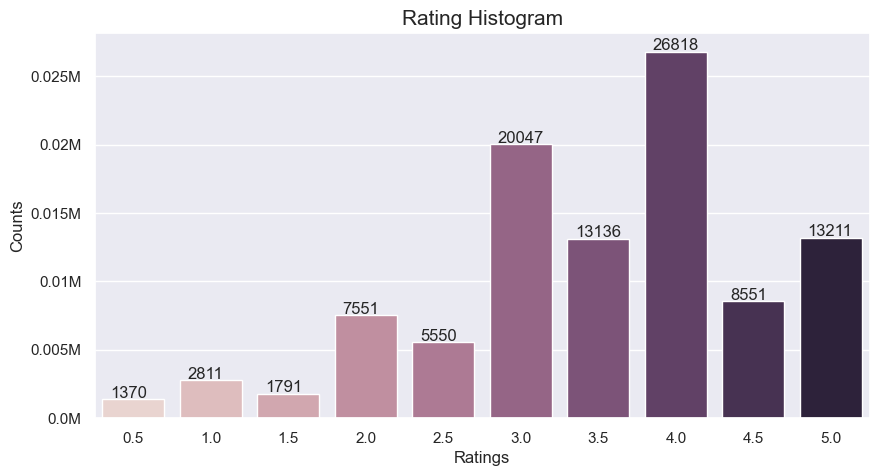

In [12]:
# plot rating histogram
fig, axes = plt.subplots(1, 1, figsize=(10, 5))

sns.countplot(x='rating', data=movie_merged_data, ax=axes, hue='rating', legend=False)

axes.set_yticklabels([str(num/10**6) + "M" for num in axes.get_yticks()])
for column in axes.patches:
    axes.annotate('{}'.format(int(column.get_height())), (column.get_x() + 0.1, column.get_height() + 100))

plt.title("Rating Histogram", fontsize=15)
plt.xlabel("Ratings")
plt.ylabel("Counts")
plt.show()

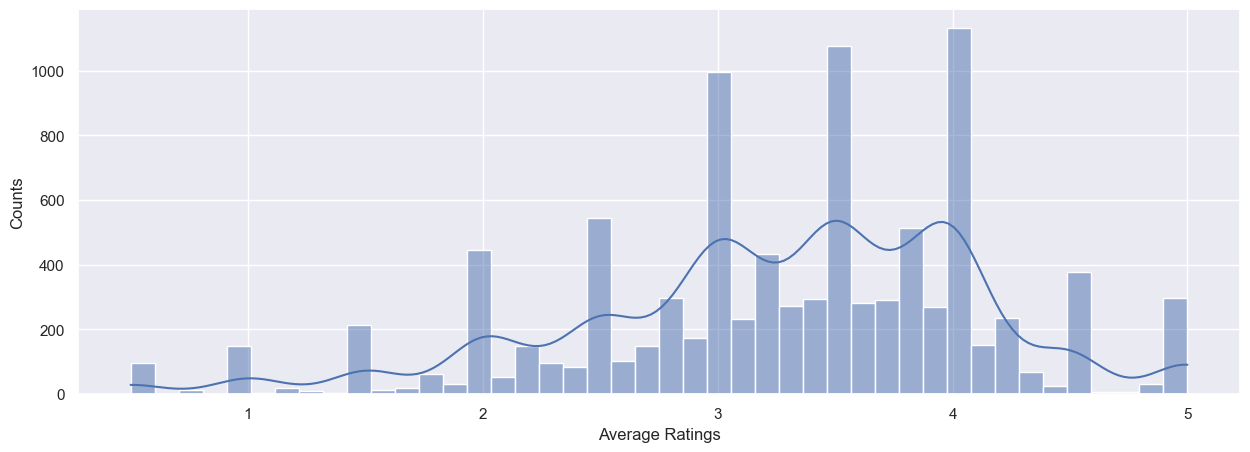

In [13]:
movie_rating_count_mean_rounded = copy.deepcopy(movie_rating_count_mean)
movie_rating_count_mean_rounded[('rating', 'mean')] = movie_rating_count_mean_rounded[('rating', 'mean')].round(1)

fig, axes = plt.subplots(1, 1, figsize=(15, 5))
sns.histplot(x=('rating', 'mean'), data=movie_rating_count_mean_rounded, ax=axes, legend=False, kde=True)

plt.xlabel("Average Ratings")
plt.ylabel("Counts")
plt.show()


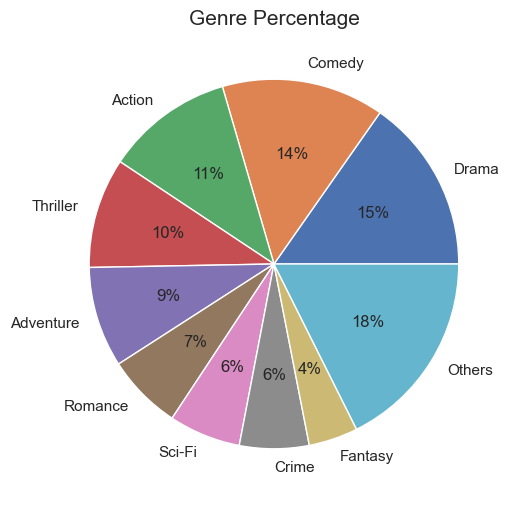

In [14]:
def n_movies_per_genre(data):
    genre_dict = {}
    for idx, genre_list in enumerate(data['genres']):
        for genre in genre_list:
            if genre in genre_dict:
                genre_dict[genre] += 1
            else:
                genre_dict[genre] = 1
    movie_genre_data = pd.DataFrame(genre_dict.items(), columns=['genre', 'count'])
    return movie_genre_data

movie_genre_data = n_movies_per_genre(movie_merged_data)
n_genres = movie_genre_data.shape[0]
movie_genre_data_sorted = movie_genre_data.sort_values('count', ascending=False).reset_index()
sum_bottom_rows = movie_genre_data_sorted['count'][9:].sum()

movie_genre_data_sorted.drop(movie_genre_data_sorted.index[10:], inplace=True)
movie_genre_data_sorted.drop(columns=['index'], inplace=True)
movie_genre_data_sorted.loc[9] = ['Others', sum_bottom_rows]


# palette_color = sns.color_palette('pastel') 
fig, axes = plt.subplots(1, 1, figsize=(6, 6))
axes.set_title("Genre Percentage", fontsize=15)
axes.pie(x=movie_genre_data_sorted['count'], labels=movie_genre_data_sorted['genre'], autopct='%.0f%%') 
plt.show()

### 3.2 Bivariate Analysis

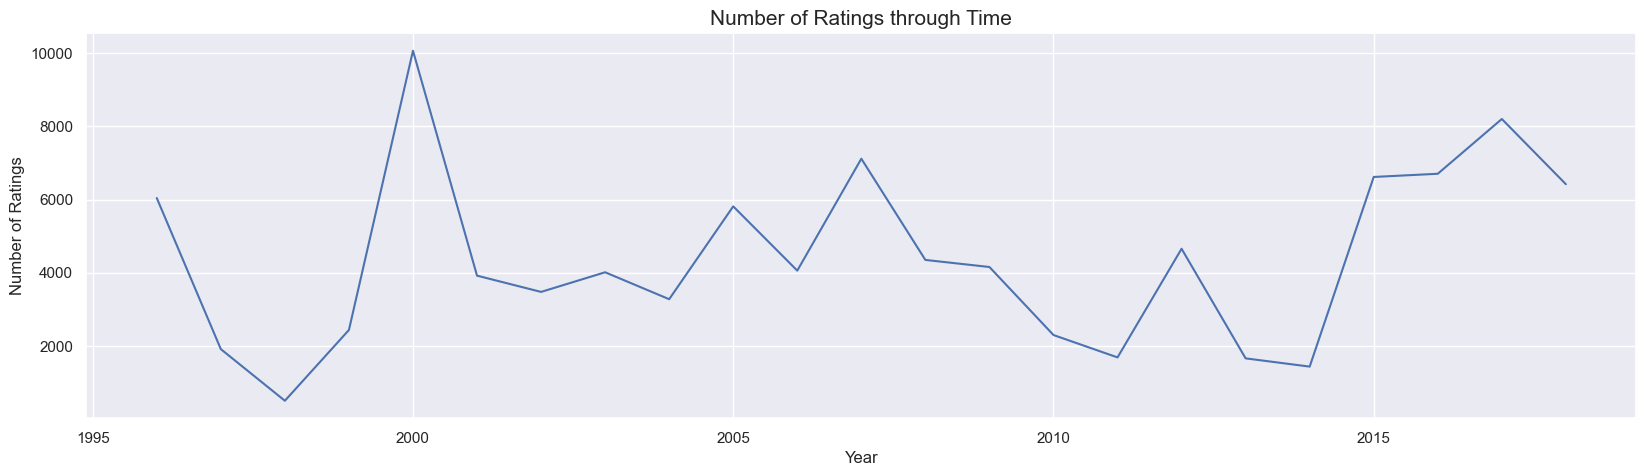

In [25]:
# number of ratings through time
def n_ratings_through_time(data):
    year_dict = {}
    for idx, date in enumerate(data['updated_date']):
        date = datetime.strptime(date, '%d-%m-%Y')
        year = date.year
        if year in year_dict:
            year_dict[year] += 1
        else:
            year_dict[year] = 1
    year_data = pd.DataFrame(year_dict.items(), columns=['year', 'count'])
    return year_data

year_data = n_ratings_through_time(movie_merged_data)

fig, axes = plt.subplots(1, 1, figsize=(20, 5))
sns.lineplot(x='year', y='count', data=year_data, ax=axes)
plt.title("Number of Ratings through Time", fontsize=15)
plt.xlabel("Year")
plt.ylabel("Number of Ratings")
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_21408\3361188579.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels([f"{1900+x_label*10}s" for x_label in axes.get_xticks()])


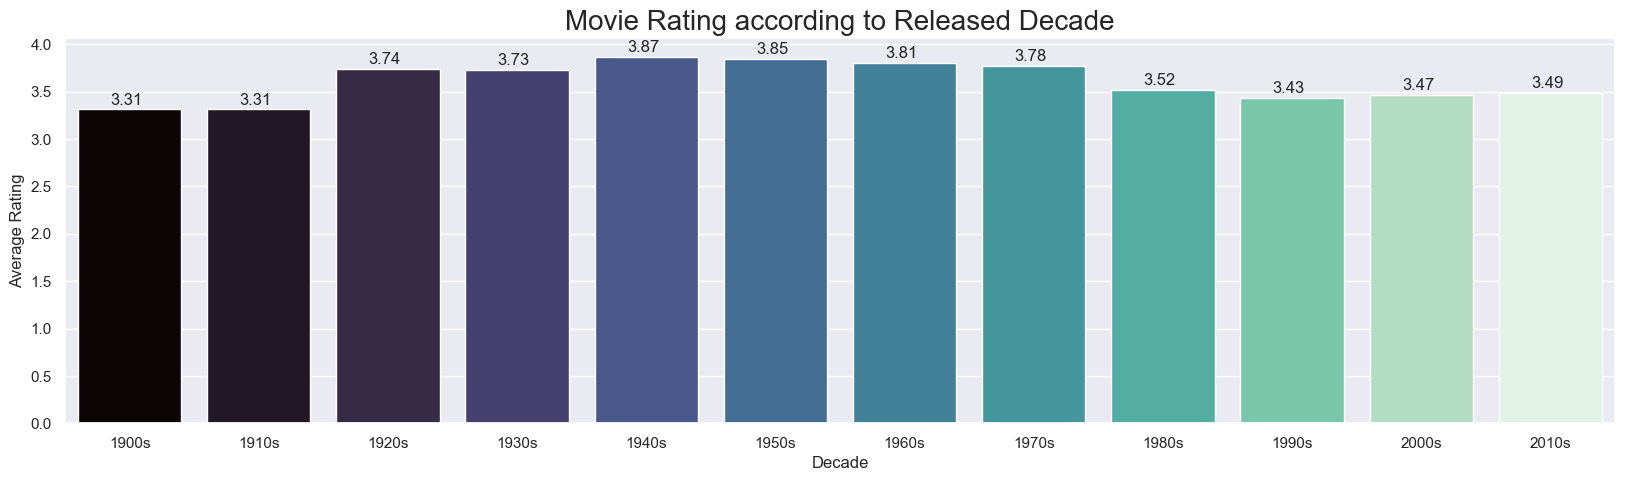

In [104]:
# movie rating according to decade
def movie_rating_through_time(data):
    decade_dict = {}
    for idx, title in enumerate(data['title']):
        try:
            year = int(title[-5:-1])
            decade = year - year % 10
        except:
            continue   # the title is of format <title>(YYYY)
        if decade in decade_dict:
            decade_dict[decade].append(data['rating'].iloc[idx])
        else:
            decade_dict[decade] = [data['rating'].iloc[idx]]
    for decade in decade_dict:
        decade_dict[decade] = np.mean(decade_dict[decade])
    decade_data = pd.DataFrame(decade_dict.items(), columns=['decade', 'rating'])
    return decade_data

decade_rating_data = movie_rating_through_time(movie_merged_data)
# print(decade_rating_data)

fig, axes = plt.subplots(1, 1, figsize=(20, 5))
sns.barplot(x='decade', y='rating', data=decade_rating_data, ax=axes, hue='decade', legend=False, palette='mako')
plt.title("Movie Rating according to Released Decade", fontsize=20)
axes.set_xticklabels([f"{1900+x_label*10}s" for x_label in axes.get_xticks()])
for column in axes.patches:
    plt.annotate('{}'.format(round(column.get_height(), 2)), (column.get_x() + 0.25, column.get_height() + 0.05))
plt.xlabel("Decade")
plt.ylabel("Average Rating")
plt.show()

## 4. Recommendation Model

### 4.0 Train / Test Splitting

### 4.1 Model Building

### 4.2 Model Training

### 4.3 Model Evaluation